# Assignment 8
Weeks 10 & 11 - matplotlib & seaborn

In [1]:
# import packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Import Data
Data represents soil transfers in NYC and is available at
https://data.cityofnewyork.us/Environment/NYC-Clean-Soil-Bank-Generating-and-Receiving-Sites/b4dv-8mq4

In [2]:
raw_data_df = pd.read_csv("https://raw.githubusercontent.com/adavidowitz100/DATA602/main/W10/NYC_Clean_Soil_Bank_Generating_and_Receiving_Sites.csv")
raw_data_df.head()

,the_geom,addr,boro,category,genborough,generating,lat,lon,oer_projec,oer_proj_1,recborough,receiving_,status,uid,volume_cy,weight_ton
0,NaN,GreenThumb HQ,Queens,Receiving,Queens,97-11 Sutphin Blvd,NaN,NaN,17TMP0431Q,NaN,NaN,NaN,Completed,19CCSB113,90,135
1,POINT (-73.926391 40.691478),1003 Greene Ave,Brooklyn,Receiving,Brooklyn,63 North 6th Street,40.691478,-73.926391,15CVCP028K,15EHAN368K (and BCP),NaN,NaN,Completed,16CCSB048,220,330
2,POINT (-73.979744 40.698401000000004),Admiral's Row,Brooklyn,Receiving,Queens,38-01 Queen Boulevard,40.698401,-73.979744,NaN,DEP,NaN,NaN,Completed,17CCSB092,1000,"1,500"
3,POINT (-73.834251 40.759885),2 Fulton Square,Queens,Generating,NaN,NaN,40.759885,-73.834251,NaN,OEM,Manhattan,Wards Island,Completed,16CCSB066,500,750
4,POINT (-73.858075 40.728102),98-04 Queens Boulevard,Queens,Generating,NaN,NaN,40.728102,-73.858075,19TMP1900Q,NaN,Brooklyn,2175 Bergen Street,Completed,20CCSB150,460,690


In [3]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    255 non-null    object 
 1   addr        278 non-null    object 
 2   boro        277 non-null    object 
 3   category    278 non-null    object 
 4   genborough  139 non-null    object 
 5   generating  139 non-null    object 
 6   lat         255 non-null    float64
 7   lon         255 non-null    float64
 8   oer_projec  242 non-null    object 
 9   oer_proj_1  164 non-null    object 
 10  recborough  138 non-null    object 
 11  receiving_  139 non-null    object 
 12  status      278 non-null    object 
 13  uid         276 non-null    object 
 14  volume_cy   276 non-null    object 
 15  weight_ton  276 non-null    object 
dtypes: float64(2), object(14)
memory usage: 34.9+ KB


## Data Wrangling

In [4]:
tidy_df = raw_data_df.copy(deep=True)

In [5]:
# updating missing borough data
tidy_df[tidy_df["boro"].isna()]

,the_geom,addr,boro,category,genborough,generating,lat,lon,oer_projec,oer_proj_1,recborough,receiving_,status,uid,volume_cy,weight_ton
71,POINT (-73.849258 40.650841),Spring Creek Park,NaN,Receiving,New York,139 E Houston Street,40.650841,-73.849258,NaN,NaN,NaN,NaN,Complete,20CCSB167,640,960


In [6]:
tidy_df.loc[71, "boro"]= "Queens"
tidy_df[tidy_df.addr == "Spring Creek Park"]

,the_geom,addr,boro,category,genborough,generating,lat,lon,oer_projec,oer_proj_1,recborough,receiving_,status,uid,volume_cy,weight_ton
71,POINT (-73.849258 40.650841),Spring Creek Park,Queens,Receiving,New York,139 E Houston Street,40.650841,-73.849258,NaN,NaN,NaN,NaN,Complete,20CCSB167,640,960


In [7]:
# tidying soil transactions that are split into 2 rows - a receiving and generating row into a flatter structure
tidy_df.recborough = tidy_df.boro
tidy_df.receiving_ = tidy_df.addr
tidy_df = tidy_df[tidy_df.category == "Receiving"]

In [8]:
tidy_df.head()

,the_geom,addr,boro,category,genborough,generating,lat,lon,oer_projec,oer_proj_1,recborough,receiving_,status,uid,volume_cy,weight_ton
0,NaN,GreenThumb HQ,Queens,Receiving,Queens,97-11 Sutphin Blvd,NaN,NaN,17TMP0431Q,NaN,Queens,GreenThumb HQ,Completed,19CCSB113,90,135
1,POINT (-73.926391 40.691478),1003 Greene Ave,Brooklyn,Receiving,Brooklyn,63 North 6th Street,40.691478,-73.926391,15CVCP028K,15EHAN368K (and BCP),Brooklyn,1003 Greene Ave,Completed,16CCSB048,220,330
2,POINT (-73.979744 40.698401000000004),Admiral's Row,Brooklyn,Receiving,Queens,38-01 Queen Boulevard,40.698401,-73.979744,NaN,DEP,Brooklyn,Admiral's Row,Completed,17CCSB092,1000,"1,500"
6,POINT (-74.020936 40.657099),Bush Terminal Pond,Brooklyn,Receiving,Queens,52-01 Queens Blvd,40.657099,-74.020936,12CVCP066Q,Parks,Brooklyn,Bush Terminal Pond,Completed,13CCSB001,2040,3060
8,POINT (-73.896939 40.649136),Ponderosa,Brooklyn,Receiving,Queens,97-11 Sutphin Blvd,40.649136,-73.896939,17TMP0431Q,NaN,Brooklyn,Ponderosa,Completed,19CCSB113,120,180


In [9]:
# removing redundant or unneeded columns and renaming
tidy_df = tidy_df[["genborough", "generating", "recborough", "receiving_", "volume_cy", "weight_ton"]]
tidy_df.columns = ['gen_boro', 'gen_addr', 'rec_boro', 'rec_addr', 'volume_cy', 'weight_ton']
tidy_df.head()

,gen_boro,gen_addr,rec_boro,rec_addr,volume_cy,weight_ton
0,Queens,97-11 Sutphin Blvd,Queens,GreenThumb HQ,90,135
1,Brooklyn,63 North 6th Street,Brooklyn,1003 Greene Ave,220,330
2,Queens,38-01 Queen Boulevard,Brooklyn,Admiral's Row,1000,"1,500"
6,Queens,52-01 Queens Blvd,Brooklyn,Bush Terminal Pond,2040,3060
8,Queens,97-11 Sutphin Blvd,Brooklyn,Ponderosa,120,180


In [10]:
tidy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 277
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gen_boro    139 non-null    object
 1   gen_addr    139 non-null    object
 2   rec_boro    139 non-null    object
 3   rec_addr    139 non-null    object
 4   volume_cy   138 non-null    object
 5   weight_ton  138 non-null    object
dtypes: object(6)
memory usage: 7.6+ KB


In [11]:
# drop NAs from volume and weight (must be an error)
tidy_df = tidy_df.dropna()

In [12]:
# update types
tidy_df.volume_cy = tidy_df.volume_cy.astype('string')
tidy_df.volume_cy = tidy_df.volume_cy.map(lambda x: x.replace(',', ''))
tidy_df.volume_cy = pd.to_numeric(tidy_df.volume_cy)

tidy_df.weight_ton = tidy_df.weight_ton.astype('string')
tidy_df.weight_ton = tidy_df.weight_ton.map(lambda x: x.replace(',', ''))
tidy_df.weight_ton = pd.to_numeric(tidy_df.weight_ton)

tidy_df.gen_addr = tidy_df.gen_addr.astype('string')
tidy_df.rec_addr = tidy_df.rec_addr.astype('string')

In [13]:
tidy_df.gen_boro.unique()

array(['Queens', 'Brooklyn', 'New York', 'Manhattan', 'New Rochelle',
       'Staten Island', 'Bronx'], dtype=object)

In [14]:
tidy_df.loc[tidy_df['gen_boro'] == 'New Rochelle', 'gen_boro'] = 'Other'
tidy_df.loc[tidy_df['gen_boro'] == 'New York', 'gen_boro'] = 'Manhattan'
tidy_df.gen_boro.unique()

array(['Queens', 'Brooklyn', 'Manhattan', 'Other', 'Staten Island',
       'Bronx'], dtype=object)

In [15]:
tidy_df.rec_boro.unique()

array(['Queens', 'Brooklyn', 'Staten island', 'Staten Island', 'Bronx',
       'Manhattan', 'Citywide'], dtype=object)

In [16]:
tidy_df.loc[tidy_df['rec_boro'] == 'Staten island', 'rec_boro'] = 'Staten Island'

In [17]:
# 'citywide' for a generating or receiving borough implies that multiple shipments were combined inappropriately
tidy_df = tidy_df[tidy_df.rec_boro != "Citywide"]

In [18]:
tidy_df.rec_boro.unique()

array(['Queens', 'Brooklyn', 'Staten Island', 'Bronx', 'Manhattan'],
      dtype=object)

In [19]:
tidy_df.gen_boro = tidy_df.gen_boro.astype("category")
tidy_df.rec_boro = tidy_df.rec_boro.astype("category")

In [20]:
tidy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 277
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gen_boro    136 non-null    category
 1   gen_addr    136 non-null    string  
 2   rec_boro    136 non-null    category
 3   rec_addr    136 non-null    string  
 4   volume_cy   136 non-null    int64   
 5   weight_ton  136 non-null    float64 
dtypes: category(2), float64(1), int64(1), string(2)
memory usage: 6.0 KB


In [21]:
# calculating density
tidy_df["density"] = tidy_df.weight_ton / tidy_df.volume_cy

Given the relative uniform density it appears that either volume or weight was already a calculated column with all variance being accounted by rounding errors. There should be natural variance in the density of different soils.

## Data Exploration

In [22]:
tidy_df.describe()

,volume_cy,weight_ton,density
count,136.000000,136.000000,136.000000
mean,2714.477941,4071.727941,1.500204
std,6523.036107,9784.552791,0.002259
min,19.000000,29.000000,1.500000
25%,123.750000,185.625000,1.500000
50%,550.000000,825.000000,1.500000
75%,2160.000000,3240.000000,1.500000
max,55450.000000,83175.000000,1.526316


In [23]:
# The max volume and weight is a clear outlier of dirt shipments so attention to outliers will have to be considered throughout
tidy_df[tidy_df.volume_cy == 55450]

,gen_boro,gen_addr,rec_boro,rec_addr,volume_cy,weight_ton,density
24,Brooklyn,BAM South - 113 Flatbush Avenue,Staten Island,Staten Island Marine Development (SIMD),55450,83175.0,1.5


## Visualizations
### Part 1

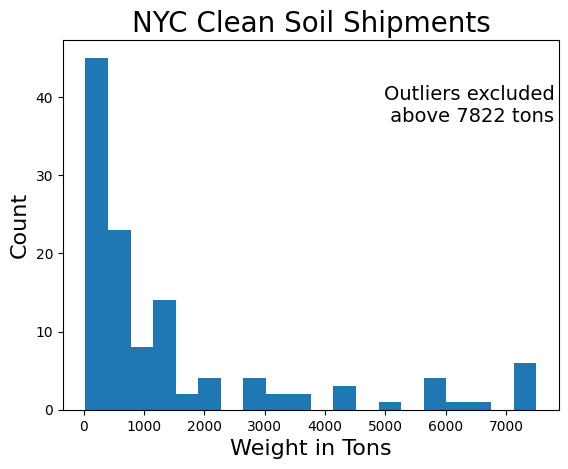

In [24]:
# distribution of weight in tons excluding outliers using IQR

outlier_cutoff = np.quantile(tidy_df["weight_ton"], 0.75) + (1.5 * (np.quantile(tidy_df["weight_ton"], 0.75) - np.quantile(tidy_df["weight_ton"], 0.25)))
plt.hist(tidy_df[tidy_df["weight_ton"] < outlier_cutoff].weight_ton, bins = 20)
# adding title and axis labels
plt.xlabel("Weight in Tons", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("NYC Clean Soil Shipments", fontsize = 20)
# adding note regarding outliers
plt.annotate('Outliers excluded\n above ' + str(round(outlier_cutoff)) + ' tons',
            xy=(.6, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=14)
plt.show()

In [25]:
# pivot table showing total soil weight by generating and receiving boroughs
pivot = pd.pivot_table(tidy_df, values='weight_ton', index='gen_boro', columns='rec_boro', aggfunc=np.sum, margins=True)
pivot = pivot.sort_values('All', ascending=False)
pivot

rec_boro,Bronx,Brooklyn,Manhattan,Queens,Staten Island,All
gen_boro,,,,,,
All,52547.5,163114.5,16238.0,36645.0,285210.0,553755.0
Brooklyn,11062.5,60102.0,11250.0,1815.0,159000.0,243229.5
Queens,27569.0,100492.5,4988.0,33120.0,34773.0,200942.5
Staten Island,0.0,0.0,0.0,0.0,75634.5,75634.5
Manhattan,0.0,1800.0,0.0,1710.0,11640.0,15150.0
Other,11903.0,0.0,0.0,0.0,0.0,11903.0
Bronx,2013.0,720.0,0.0,0.0,4162.5,6895.5


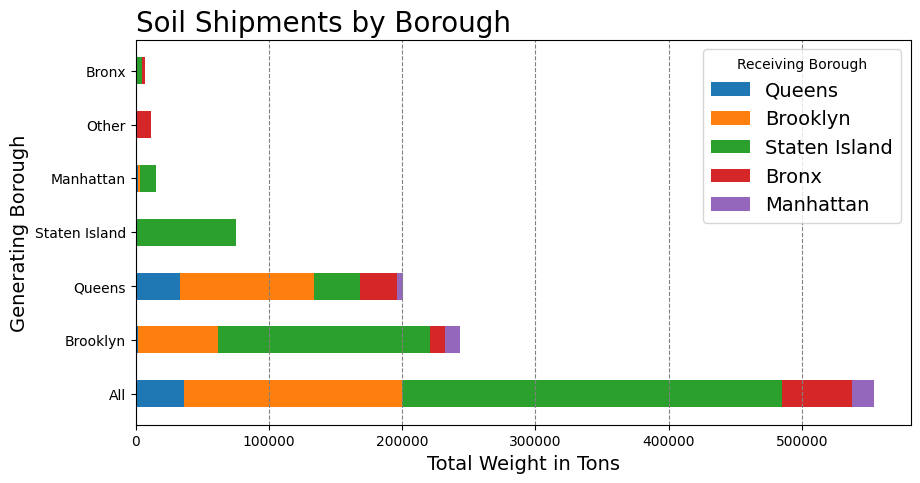

In [26]:
# plot for the above pivot of soil weights by borough in stacked bars
# figure and axis
fig, ax = plt.subplots(1, figsize=(10, 5))
# plot bars
left = len(pivot) * [0]
for idx, name in enumerate(tidy_df.rec_boro.unique()):
    plt.barh(pivot.index, pivot[name], left = left, height=0.5)
    left = left + pivot[name]
# title, legend, labels
plt.title('Soil Shipments by Borough', loc='left', fontsize=20)
plt.legend(tidy_df.rec_boro.unique(), title='Receiving Borough', fontsize=14)
plt.xlabel('Total Weight in Tons', fontsize=14)
plt.ylabel('Generating Borough', fontsize=14)
# draw grid lines
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

## Visualizations
### Part 2

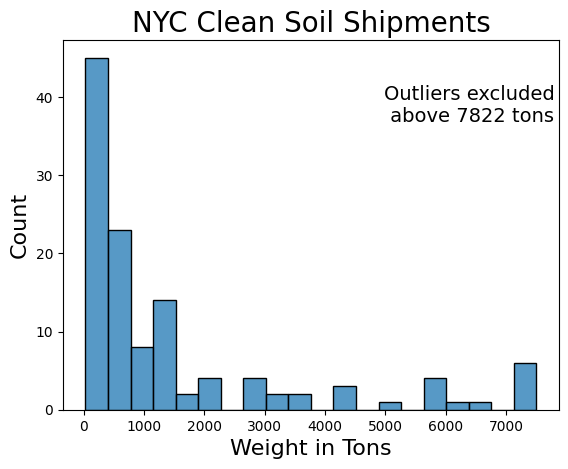

In [27]:
# distribution of weight in tons excluding outliers using IQR

sns.histplot(tidy_df[tidy_df["weight_ton"] < outlier_cutoff].weight_ton, bins = 20)
plt.xlabel("Weight in Tons", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("NYC Clean Soil Shipments", fontsize = 20)
plt.annotate('Outliers excluded\n above ' + str(round(outlier_cutoff)) + ' tons',
            xy=(.6, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=14)
plt.show()

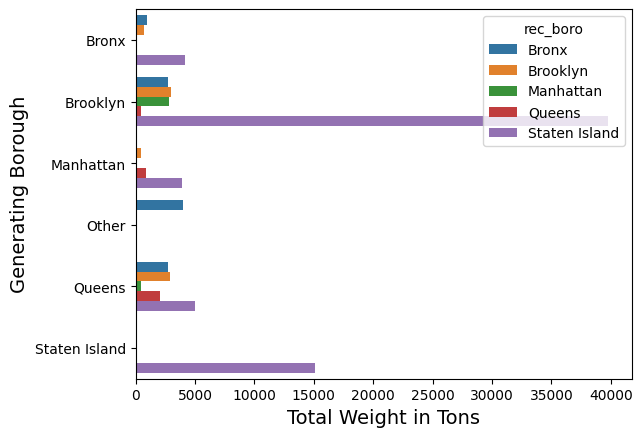

In [28]:
# from what I can find Seaborn does not have any straightforward way to generate a stacking bar plot like the
# 'bottom' parameter in matplotlib (or in this case 'left'). The solution I see online is to overlay 
# multiple bars while calculating a running sum for height. 
# That seems more difficult with 5 levels than just using matplotlib
bar_plot1 = sns.barplot(x='weight_ton', y='gen_boro', data=tidy_df, hue="rec_boro", errorbar=None)
plt.xlabel('Total Weight in Tons', fontsize=14)
plt.ylabel('Generating Borough', fontsize=14)
plt.show()

### Part 3
It seems like the biggest difference in creating plots with matplolib and seaborn is the data structure that is intended to be used to generate plots. Another difference is that seaborn is easier to create generic "fancy" looking visualizations. If you have tidy data you can quickly bang out an atractive looking plot. I found that to be true for my histogram but not really supported for the stacked bar chart. There may not always be a Seaborn version of a particular plot.

## Conclusions
The biggest take away from my analysis of soil transfers in New York City is that I would like to suggest that NYC add a date field for data set. Unfortunately there was not a lot of interesting analysis possible due to data quality. One thing I would like to highlight is that soil that comes from Staten Island stays in Staten Island. 